In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-cure-discography/thecure_discography.csv


In [2]:
ls

__notebook__.ipynb


In [3]:
df = pd.read_csv("/kaggle/input/the-cure-discography/thecure_discography.csv")
df.head()

,Unnamed: 0,album_uri,album_name,album_img,album_release_date,album_release_year,album_popularity,track_name,track_uri,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,key_mode,track_popularity
0,1,33TDfmEXufojT6jxgb3BTK,Pornography,https://i.scdn.co/image/fbec42025b461d54853ba6...,1982-05-03,1982-05-03,34,One Hundred Years - Remastered Version,6o8bpkuFMRS2b25Vui9aDC,0.436,...,0.0439,0.001230,0.509,0.1080,0.262,132.590,401000,4,G major,33
1,2,33TDfmEXufojT6jxgb3BTK,Pornography,https://i.scdn.co/image/fbec42025b461d54853ba6...,1982-05-03,1982-05-03,34,A Short Term Effect - Remastered Version,4GiVSZ0UcbW0vzVMLnBdDT,0.516,...,0.0319,0.001710,0.165,0.1360,0.649,116.566,262493,4,C major,28
2,3,33TDfmEXufojT6jxgb3BTK,Pornography,https://i.scdn.co/image/fbec42025b461d54853ba6...,1982-05-03,1982-05-03,34,The Hanging Garden - Remastered Version,6mbZmbZ8wr5DA2CAB3q1GW,0.420,...,0.0393,0.004020,0.488,0.0795,0.634,135.421,274240,4,C major,35
3,4,33TDfmEXufojT6jxgb3BTK,Pornography,https://i.scdn.co/image/fbec42025b461d54853ba6...,1982-05-03,1982-05-03,34,Siamese Twins - Remastered Version,3x6F5xwseHgXIjptORmGAI,0.772,...,0.0364,0.000298,0.795,0.2820,0.752,94.194,328360,4,D major,34
4,5,33TDfmEXufojT6jxgb3BTK,Pornography,https://i.scdn.co/image/fbec42025b461d54853ba6...,1982-05-03,1982-05-03,34,The Figurehead - Remastered Version,4MLYH01rrqDifXe06KAkfz,0.655,...,0.0264,0.001250,0.642,0.1100,0.727,110.370,375173,4,A# minor,28


In [4]:
df.shape

(223, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          223 non-null    int64  
 1   album_uri           223 non-null    object 
 2   album_name          223 non-null    object 
 3   album_img           223 non-null    object 
 4   album_release_date  223 non-null    object 
 5   album_release_year  223 non-null    object 
 6   album_popularity    223 non-null    int64  
 7   track_name          223 non-null    object 
 8   track_uri           223 non-null    object 
 9   danceability        223 non-null    float64
 10  energy              223 non-null    float64
 11  key                 223 non-null    object 
 12  loudness            223 non-null    float64
 13  mode                223 non-null    object 
 14  speechiness         223 non-null    float64
 15  acousticness        223 non-null    float64
 16  instrume

In [6]:
df.album_release_date = pd.to_datetime(df.album_release_date, format='%Y-%m-%d')
df.album_release_year = pd.to_datetime(df.album_release_year, format='%Y-%m-%d')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          223 non-null    int64         
 1   album_uri           223 non-null    object        
 2   album_name          223 non-null    object        
 3   album_img           223 non-null    object        
 4   album_release_date  223 non-null    datetime64[ns]
 5   album_release_year  223 non-null    datetime64[ns]
 6   album_popularity    223 non-null    int64         
 7   track_name          223 non-null    object        
 8   track_uri           223 non-null    object        
 9   danceability        223 non-null    float64       
 10  energy              223 non-null    float64       
 11  key                 223 non-null    object        
 12  loudness            223 non-null    float64       
 13  mode                223 non-null    object        

In [8]:
df['album_release_year']=df['album_release_year'].dt.year

In [9]:
import matplotlib.pyplot as plt
df.columns

Index(['Unnamed: 0', 'album_uri', 'album_name', 'album_img',
       'album_release_date', 'album_release_year', 'album_popularity',
       'track_name', 'track_uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'key_mode',
       'track_popularity'],
      dtype='object')

In [10]:
albums_by_year = df.sort_values(by=['album_release_year', 'album_name'])[['album_name', 'track_name', 'album_release_year']]
albums_by_year['album_name']=albums_by_year['album_name'].apply(lambda x: x.replace('Disintegration (Deluxe Edition [Remastered])', 'Disintegration (D.E. Rmstrd)'))
albums_by_year['album_name']=albums_by_year['album_name'].apply(lambda x: x.replace('Mixed Up (Remastered 2018 / Deluxe Edition)', 'Mixed Up (D.E. Rmstrd 2018)'))
albums_by_year['album_name'].value_counts()

The Top                         20
Kiss Me Kiss Me Kiss Me         20
Disintegration (D.E. Rmstrd)    20
Mixed Up (D.E. Rmstrd 2018)     20
Bestival Live 2011              20
Show                            18
Wild Mood Swings                14
4:13 Dream                      13
Wish                            12
Paris                           12
The Cure                        11
Concert - The Cure Live         10
The Head On The Door            10
Bloodflowers                     9
Pornography                      8
Hypnagogic States                6
Name: album_name, dtype: int64

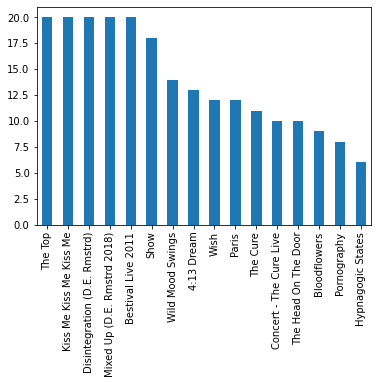

In [11]:
albums_by_year.album_name.value_counts().plot(kind='bar');

In [12]:
import seaborn as sns

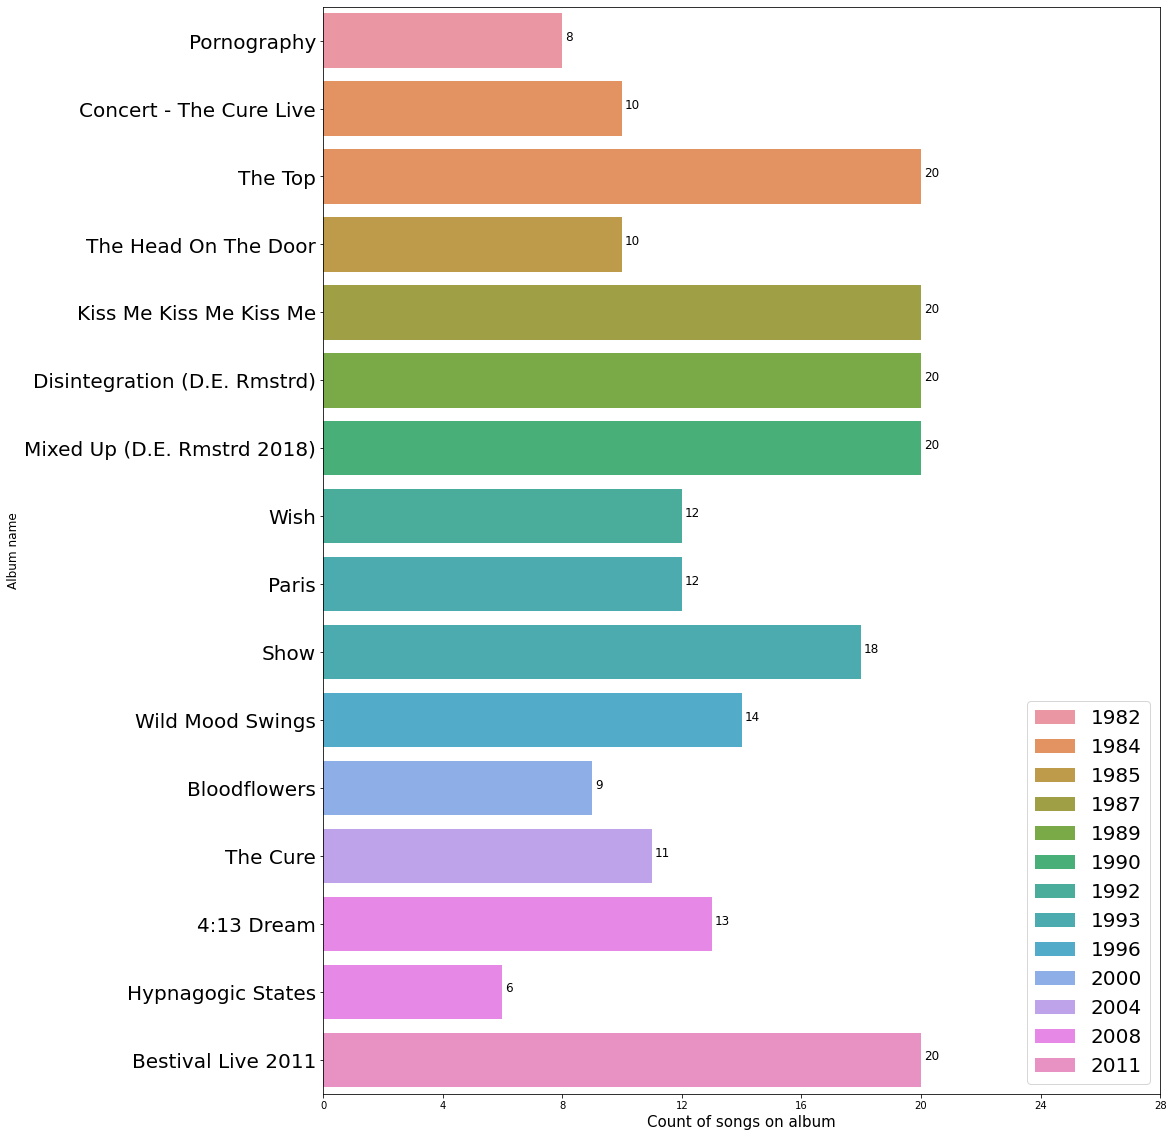

In [13]:
plt.figure(figsize=(15,20))
plt.rc('ytick', labelsize=20) 
b = sns.countplot(y='album_name', data=albums_by_year, hue = 'album_release_year', dodge=False)
b.set_xlabel('Count of songs on album', fontsize=15)
b.set_ylabel('Album name', fontsize=12)
b.set_xticks(range(0,30,4))
b.legend(fontsize=20, loc='lower right')
# label each bar with count of songs per album
for p in b.patches:
    count = p.get_width().astype(int)
    b.text(p.get_x() + p.get_width() + 0.1, p.get_y() + p.get_height()/2, count, fontsize=12);

In [14]:
df.head()

,Unnamed: 0,album_uri,album_name,album_img,album_release_date,album_release_year,album_popularity,track_name,track_uri,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,key_mode,track_popularity
0,1,33TDfmEXufojT6jxgb3BTK,Pornography,https://i.scdn.co/image/fbec42025b461d54853ba6...,1982-05-03,1982,34,One Hundred Years - Remastered Version,6o8bpkuFMRS2b25Vui9aDC,0.436,...,0.0439,0.001230,0.509,0.1080,0.262,132.590,401000,4,G major,33
1,2,33TDfmEXufojT6jxgb3BTK,Pornography,https://i.scdn.co/image/fbec42025b461d54853ba6...,1982-05-03,1982,34,A Short Term Effect - Remastered Version,4GiVSZ0UcbW0vzVMLnBdDT,0.516,...,0.0319,0.001710,0.165,0.1360,0.649,116.566,262493,4,C major,28
2,3,33TDfmEXufojT6jxgb3BTK,Pornography,https://i.scdn.co/image/fbec42025b461d54853ba6...,1982-05-03,1982,34,The Hanging Garden - Remastered Version,6mbZmbZ8wr5DA2CAB3q1GW,0.420,...,0.0393,0.004020,0.488,0.0795,0.634,135.421,274240,4,C major,35
3,4,33TDfmEXufojT6jxgb3BTK,Pornography,https://i.scdn.co/image/fbec42025b461d54853ba6...,1982-05-03,1982,34,Siamese Twins - Remastered Version,3x6F5xwseHgXIjptORmGAI,0.772,...,0.0364,0.000298,0.795,0.2820,0.752,94.194,328360,4,D major,34
4,5,33TDfmEXufojT6jxgb3BTK,Pornography,https://i.scdn.co/image/fbec42025b461d54853ba6...,1982-05-03,1982,34,The Figurehead - Remastered Version,4MLYH01rrqDifXe06KAkfz,0.655,...,0.0264,0.001250,0.642,0.1100,0.727,110.370,375173,4,A# minor,28


In [15]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
df.columns

Index(['album_uri', 'album_name', 'album_img', 'album_release_date',
       'album_release_year', 'album_popularity', 'track_name', 'track_uri',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'key_mode', 'track_popularity'],
      dtype='object')

In [17]:
song_moods = df[['album_name', 'track_name', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'key_mode']]
song_moods.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.520341,0.768982,-8.486027,0.049394,0.149261,0.233470,0.403882,0.503273,129.404668
std,0.135878,0.157281,3.847060,0.031209,0.182739,0.295339,0.326814,0.210575,29.393823
min,0.175000,0.284000,-24.265000,0.023300,0.000030,0.000000,0.038900,0.042200,74.919000
25%,0.431000,0.674500,-11.356000,0.032450,0.012700,0.001285,0.117500,0.343500,108.812000
50%,0.528000,0.805000,-7.727000,0.040500,0.067400,0.060600,0.300000,0.506000,128.105000
75%,0.608000,0.900000,-5.750500,0.051400,0.218000,0.457000,0.694500,0.658000,150.101500
max,0.848000,0.998000,-1.378000,0.267000,0.759000,0.933000,1.000000,0.960000,204.468000


Note: none of this data is missing

In [18]:
song_moods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   album_name        223 non-null    object 
 1   track_name        223 non-null    object 
 2   danceability      223 non-null    float64
 3   energy            223 non-null    float64
 4   key               223 non-null    object 
 5   loudness          223 non-null    float64
 6   mode              223 non-null    object 
 7   speechiness       223 non-null    float64
 8   acousticness      223 non-null    float64
 9   instrumentalness  223 non-null    float64
 10  liveness          223 non-null    float64
 11  valence           223 non-null    float64
 12  tempo             223 non-null    float64
 13  key_mode          223 non-null    object 
dtypes: float64(9), object(5)
memory usage: 24.5+ KB


In [19]:
sm_non_numeric_cols = [col for col in song_moods.columns if song_moods[col].dtype=='object']
song_moods_cat = song_moods[sm_non_numeric_cols]
song_moods_cat.head()

,album_name,track_name,key,mode,key_mode
0,Pornography,One Hundred Years - Remastered Version,G,major,G major
1,Pornography,A Short Term Effect - Remastered Version,C,major,C major
2,Pornography,The Hanging Garden - Remastered Version,C,major,C major
3,Pornography,Siamese Twins - Remastered Version,D,major,D major
4,Pornography,The Figurehead - Remastered Version,A#,minor,A# minor


In [20]:
song_moods_cat.key.value_counts()

A     55
D     35
C     29
G     23
B     19
E     18
F#    16
F     12
C#     7
A#     6
G#     2
D#     1
Name: key, dtype: int64

<AxesSubplot:>

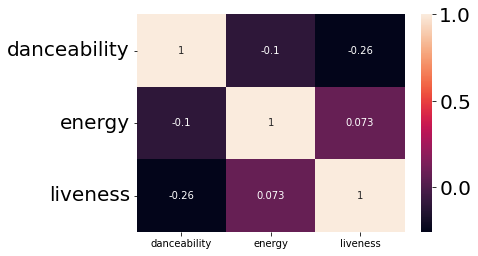

In [21]:
# these sound like they might be highly correlated
song_moods_fun = song_moods[['danceability', 'energy', 'liveness']]
song_moods_fun.head()
sns.heatmap(song_moods_fun.corr(), annot=True)

Hmmm.  Time to google these terms, because I would definitely *not* expect a higher energy song to be less danceable.  

From [maelfabien](https://maelfabien.github.io/Hack-3/#)<br>
**duration_ms:** The duration of the track in milliseconds.<br>
**key:** The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.<br>
**mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.<br>
**time_signature:** An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).<br>
**acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. <br>
**danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. <br>
**energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. <br>
**instrumentalness:** Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater the likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. <br>
**liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live. <br>
**loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 dB. <br>
**speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. <br>
**valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). <br>
tempo: The overall estimated tempo of the section in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.<br>
**key:** The estimated overall key of the section. The values in this field ranging from 0 to 11 mapping to pitches using standard Pitch Class notation (E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on). If no key was detected, the value is -1.<br>
**mode:** integer Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. This field will contain a 0 for “minor”, a 1 for “major”, or a -1 for no result. Note that the major key (e.g. C major) could more likely be confused with the minor key at 3 semitones lower (e.g. A minor) as both keys carry the same pitches.<br>
**mode_confidence:** The confidence, from 0.0 to 1.0, of the reliability of the mode.<br>
**time_signature:** An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of “3/4”, to “7/4”.

So yes - I should take out liveness as this just means was the song probably performed live.  Also, I will definitely include valence.  In fact, I would think that more Cure songs are sad, depressed, or angry than happy.  I will check this now.

In [22]:
happier = song_moods[song_moods.valence >= 0.5]
happier.shape

(117, 14)

In [23]:
happy_keys = happier.key.value_counts()/len(happier)

In [24]:
sadder = song_moods.drop(happier.index)
sadder.shape
sad_keys = sadder.key.value_counts()/len(sadder)

In [25]:
happy_keys = pd.DataFrame(happy_keys)
sad_keys = pd.DataFrame(sad_keys)
happy_keys.rename(columns = {"key": "happy_percent"}, 
          inplace = True)
sad_keys.rename(columns = {"key": "sad_percent"}, 
          inplace = True)
sad_keys.head()

,sad_percent
A,0.179245
G,0.150943
D,0.150943
C,0.122642
F,0.113208


In [26]:
# do an outer join to try to find which keys are more commonly happy or sad
key_mood = pd.concat([happy_keys, sad_keys], axis=1)

In [27]:
key_mood

,happy_percent,sad_percent
A,0.307692,0.179245
D,0.162393,0.150943
C,0.136752,0.122642
B,0.119658,0.047170
E,0.076923,0.084906
F#,0.076923,0.066038
G,0.059829,0.150943
C#,0.025641,0.037736
A#,0.017094,0.037736
G#,0.017094,NaN


It's interesting to change the threshold on what is happy (>=.5, >=.7, etc.) and watch the percents change in the keys above.

In [28]:
love = df[df['track_name'].str.lower().str.contains('love')]
love.sort_values(['valence', 'tempo'], ascending=False)[['track_name', 'valence', 'tempo']]

,track_name,valence,tempo
71,Lovesong,0.821,140.112
92,Lovesong - Extended Mix,0.789,140.022
208,Lovesong - Bestival Live 2011,0.728,140.016
126,Love Song,0.638,139.243
114,Friday I'm In Love,0.505,136.203
213,Friday I'm In Love - Bestival Live 2011,0.433,144.979
144,"Friday I'm In Love - Live At The Palace, Aubur...",0.333,143.554


Lol I'm about ready to stop on this dataset.  *HOW* is *Lovesong* happier than *Friday I'm In Love*??!?

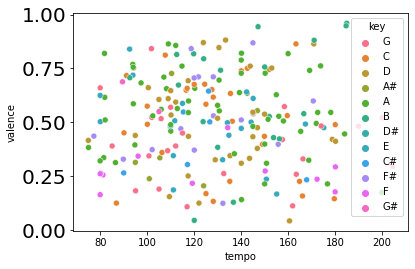

In [29]:
sns.scatterplot(x='tempo', y='valence', data=df, hue='key');

Well.  I seem to have no intuition for music, eh?

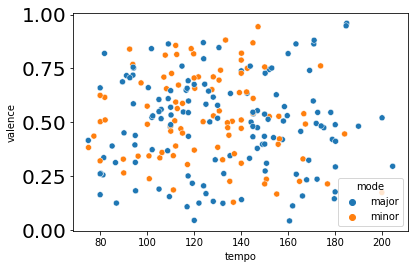

In [30]:
sns.scatterplot(x='tempo', y='valence', data=df, hue='mode');

<AxesSubplot:xlabel='mode'>

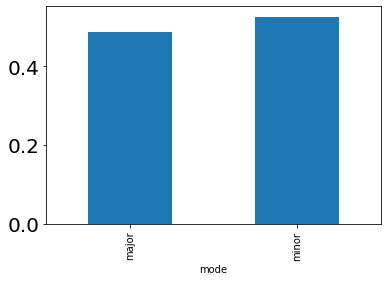

In [31]:
df.groupby('mode')['valence'].mean().plot(kind='bar')

And...moving on! :)